In [1]:
import os
import numpy as np
import math
import scipy
import pandas as pd

import lmfit
from scipy.stats import norm, chi2 
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline 
from scipy.optimize import root_scalar

# Create interpolation functions

import matplotlib.pyplot as plt

In [28]:
custom_palette = [
    '#377eb8', '#ff7f00', '#4daf4a',
    '#f781bf', '#a65628', '#984ea3',
    '#999999', '#e41a1c', '#dede00'
]

vinh_palette = ['chocolate', 'maroon', 'darkcyan', 'darkblue', 'deeppink', 'darkviolet']

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=custom_palette)
#plt.rcParams["axes.prop_cycle"] = plt.cycler(color=vinh_palette)


In [10]:
DATA_365 = pd.read_csv("photoelectric_data_365.0_day3.csv")
DATA_404 = pd.read_csv("photoelectric_data_404.7_day3.csv")
DATA_435 = pd.read_csv("photoelectric_data_435.8_day3.csv")
DATA_546 = pd.read_csv("photoelectric_data_546.1_day3.csv")
DATA_577 = pd.read_csv("photoelectric_data_577.0_day3.csv")

In [11]:
V_365 = np.array([float(V) for V in DATA_365[DATA_365.keys()[0]][1:].tolist()])
I_365 = np.array([float(I) for I in DATA_365[DATA_365.keys()[1]][1:].tolist()])
I_365_err = np.array([float(I) for I in DATA_365[DATA_365.keys()[2]][1:].tolist()])

V_404 = np.array([float(V) for V in DATA_404[DATA_404.keys()[0]][1:].tolist()])
I_404 = np.array([float(I) for I in DATA_404[DATA_404.keys()[1]][1:].tolist()])
#I_404_err = np.array([float(I) for I in DATA_404[DATA_404.keys()[2]][1:].tolist()])

V_435 = np.array([float(V) for V in DATA_435[DATA_435.keys()[0]][1:].tolist()])
I_435 = np.array([float(I) for I in DATA_435[DATA_435.keys()[1]][1:].tolist()])
#I_435_err = np.array([float(I) for I in DATA_435[DATA_435.keys()[2]][1:].tolist()])

V_546 = np.array([float(V) for V in DATA_546[DATA_546.keys()[0]][1:].tolist()])
I_546 = np.array([float(I) for I in DATA_546[DATA_546.keys()[1]][1:].tolist()])
#I_546_err = np.array([float(I) for I in DATA_546[DATA_546.keys()[2]][1:].tolist()])


V_577 = np.array([float(V) for V in DATA_577[DATA_577.keys()[0]][1:].tolist()])
I_577 = np.array([float(I) for I in DATA_577[DATA_577.keys()[1]][1:].tolist()])
I_577_err = np.array([float(I) for I in DATA_577[DATA_577.keys()[2]][1:].tolist()])

In [12]:
def central_difference(x, y):
    
    x = np.asarray(x)
    y = np.asarray(y)
    n = len(x)
    dydx = np.zeros_like(y, dtype=float)
    
    # Interior points: central difference
    dydx[1:-1] = (y[2:] - y[:-2]) / (x[2:] - x[:-2])
    
    # Forward difference at the first point
    dydx[0] = (y[1] - y[0]) / (x[1] - x[0])
    
    # Backward difference at the last point
    dydx[-1] = (y[-1] - y[-2]) / (x[-1] - x[-2])
    
    return dydx


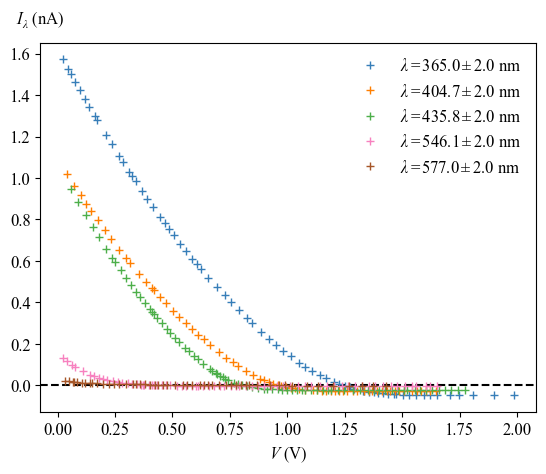

In [44]:
plt.rcParams["font.family"] = "Times New Roman"     # Normal text
plt.rcParams["mathtext.fontset"] = "custom"        # Custom math font
plt.rcParams["mathtext.rm"] = "Times New Roman"    # Roman font for math
plt.rcParams["mathtext.it"] = "Times New Roman:italic"
plt.rcParams["mathtext.bf"] = "Times New Roman:bold"
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=custom_palette)
# Optional: increase default font size
#plt.rcParams["font.size"] = 12

plt.errorbar(V_365, I_365, label = r"$\lambda = 365.0 \pm 2.0$ nm", fmt = "+")
plt.errorbar(V_404, I_404, label = r"$\lambda = 404.7 \pm 2.0$ nm", fmt = "+")
plt.errorbar(V_435, I_435, label = r"$\lambda = 435.8 \pm 2.0$ nm", fmt = "+")
plt.errorbar(V_546, I_546, label = r"$\lambda = 546.1 \pm 2.0$ nm", fmt = "+")
plt.errorbar(V_577, I_577, label = r"$\lambda = 577.0 \pm 2.0$ nm", fmt = "+")
plt.axhline(0, color='black', linestyle='--')
#plt.ylim(0, 0.03)
plt.xlabel(r"$V$ (V)")
plt.annotate(r"$ I_\lambda$ (nA)", xy=(-0.05,1.05), xycoords="axes fraction" ) 
plt.legend(frameon = False)
#plt.tight_layout()
plt.savefig('IV.pdf')

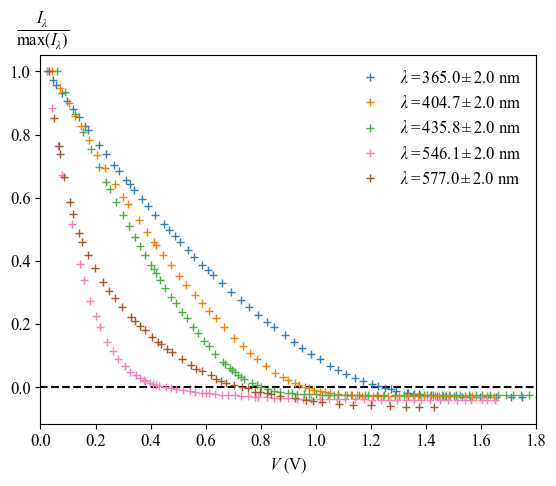

In [31]:
plt.rcParams["font.family"] = "Times New Roman"     # Normal text
plt.rcParams["mathtext.fontset"] = "custom"        # Custom math font
plt.rcParams["mathtext.rm"] = "Times New Roman"    # Roman font for math
plt.rcParams["mathtext.it"] = "Times New Roman:italic"
plt.rcParams["mathtext.bf"] = "Times New Roman:bold"

# Optional: increase default font size
plt.rcParams["font.size"] = 12

plt.errorbar(V_365, I_365/I_365[0], label = r"$\lambda = 365.0 \pm 2.0$ nm", fmt = "+")
plt.errorbar(V_404, I_404/I_404[0], label = r"$\lambda = 404.7 \pm 2.0$ nm", fmt = "+")
plt.errorbar(V_435, I_435/I_435[0], label = r"$\lambda = 435.8 \pm 2.0$ nm", fmt = "+")
plt.errorbar(V_546, I_546/I_546[0], label = r"$\lambda = 546.1 \pm 2.0$ nm", fmt = "+")
plt.errorbar(V_577, I_577/I_577[0], label = r"$\lambda = 577.0 \pm 2.0$ nm", fmt = "+")
plt.axhline(0, color='black', linestyle='--')
plt.xlim(0, 1.8)
plt.xlabel(r"$V$ (V)")
plt.legend()
plt.annotate(r"$ \dfrac{I_\lambda}{\mathrm{max}(I_\lambda)}$", xy=(-0.05,1.05), xycoords="axes fraction" ) 
plt.legend(frameon = False)
plt.savefig('normalizedIV.pdf')

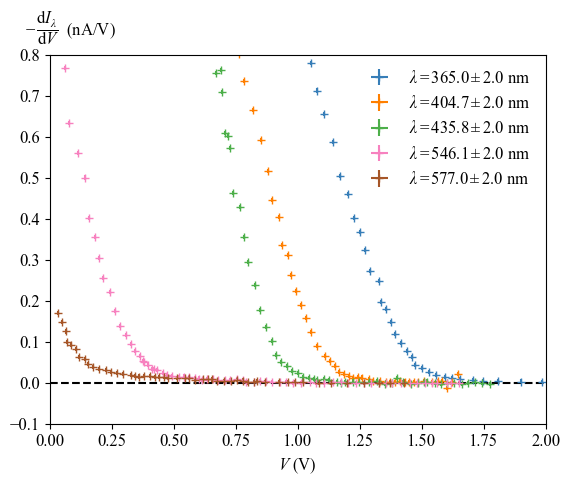

In [41]:
dIdV_365 = central_difference(V_365, I_365)
dIdV_404 = central_difference(V_404, I_404)
dIdV_435 = central_difference(V_435, I_435)
dIdV_546 = central_difference(V_546, I_546)
dIdV_577 = central_difference(V_577, I_577)



plt.errorbar(V_365, -dIdV_365, xerr = 0.0014, 
             yerr = 0.00010/0.02,
             label = r"$\lambda = 365.0 \pm 2.0$ nm", color = "C0", fmt='+')
#plt.plot(V_365, neg_dIdV_fit_365, 
         #label = r"linear fit", 
#         color = "C0", linestyle = "--")


plt.errorbar(V_404, -dIdV_404, xerr = 0.0014, 
             yerr = 0.00010/0.02,
             label = r"$\lambda = 404.7 \pm 2.0$ nm", color = "C1", fmt='+')
#plt.plot(V_404, neg_dIdV_fit_404, 
         #label = r"linear fit", 
#         color = "C1", linestyle = "--")


plt.errorbar(V_435, -dIdV_435, xerr = 0.0014, 
             yerr = 0.00010/0.02,
             label = r"$\lambda = 435.8 \pm 2.0$ nm", color = "C2", fmt='+')
#plt.plot(V_435, neg_dIdV_fit_435, 
#         label = r"linear fit",
#         color = "C2", linestyle = "--")


plt.errorbar(V_546, -dIdV_546, xerr = 0.0014, 
             yerr = 0.00010/0.02,
             label = r"$\lambda = 546.1 \pm 2.0$ nm", color = "C3", fmt='+')
#plt.plot(V_546, neg_dIdV_fit_546, 
#         #label = r"linear fit", 
#         color = "C3", linestyle = "--")

plt.errorbar(V_577, -dIdV_577, xerr = 0.0014, 
             yerr = 0.00010/0.02,
             label = r"$\lambda = 577.0 \pm 2.0$ nm", color = "C4", fmt='+')
#plt.plot(V_577, neg_dIdV_fit_577, 
#         label = r"linear fit", 
#         color = "C4", linestyle = "--")


plt.axhline(0, color='black', linestyle='--')
plt.xlabel(r"$V$ (V)")
plt.xlim(0, 2)
plt.ylim(-0.1,0.8)
plt.legend(loc = "upper right", frameon = False)
plt.annotate(r"$ -\,\dfrac{\mathrm{d} I_\lambda}{\mathrm{d}V}$  (nA/V)", xy=(-0.05,1.05), xycoords="axes fraction" ) 
plt.savefig('dIdV_withoutfit.pdf')

In [33]:
def linear(x, m, b):
    return m*x + b 

In [34]:
def fit_for_wavelength(V, dIdV, cut):
    model = lmfit.Model(linear)
    result = model.fit(x=V[cut], data=-dIdV[cut], weights = 1/(0.00025/0.02), m = 0, b = 0.5)
    lmfit.report_fit(result)

    neg_dIdV_fit = model.eval(result.params,x=V)
    
    plt.plot(V, neg_dIdV_fit)
    plt.plot(V, -dIdV)
    
    print(-result.params['b']/result.params['m'])

    return result, neg_dIdV_fit

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 11
    # variables        = 2
    chi-square         = 16.8266618
    reduced chi-square = 1.86962909
    Akaike info crit   = 8.67576306
    Bayesian info crit = 9.47155361
    R-squared          = 0.99193498
[[Variables]]
    m: -1.98232752 +/- 0.05958201 (3.01%) (init = 0)
    b:  2.84778064 +/- 0.07125710 (2.50%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(m, b) = -0.9974
1.4365843260480775


(0.0, 1.0)

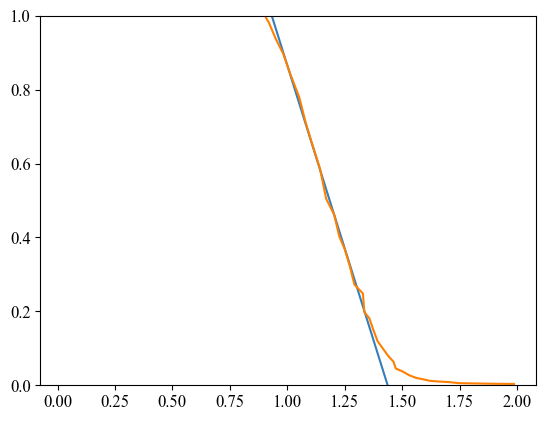

In [35]:
cut = np.intersect1d(np.where(dIdV_365 > -0.8), np.where(dIdV_365 < -0.20))
result_365, neg_dIdV_fit_365 = fit_for_wavelength(V_365, dIdV_365, cut)
plt.ylim(0,1)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 10
    # variables        = 2
    chi-square         = 11.1335627
    reduced chi-square = 1.39169534
    Akaike info crit   = 5.07379118
    Bayesian info crit = 5.67896137
    R-squared          = 0.99363010
[[Variables]]
    m: -2.53234476 +/- 0.07168559 (2.83%) (init = 0)
    b:  2.73315739 +/- 0.06481403 (2.37%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(m, b) = -0.9974
1.0792990876588553


(0.0, 1.0)

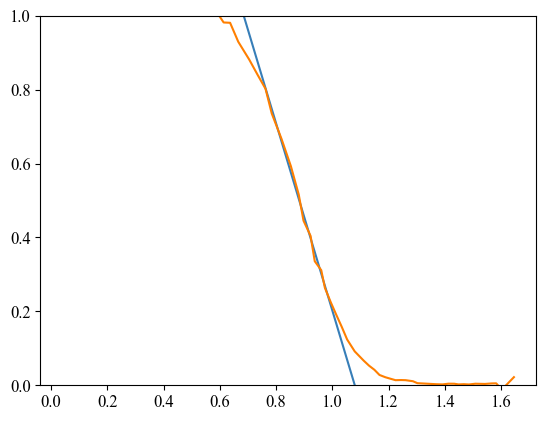

In [36]:
cut = np.intersect1d(np.where(dIdV_404 > -0.8), np.where(dIdV_404 < -0.20))
result_404, neg_dIdV_fit_404 = fit_for_wavelength(V_404, dIdV_404, cut)
plt.ylim(0,1)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 11
    # variables        = 2
    chi-square         = 64.3054789
    reduced chi-square = 7.14505321
    Akaike info crit   = 23.4232452
    Bayesian info crit = 24.2190357
    R-squared          = 0.97003002
[[Variables]]
    m: -3.60265574 +/- 0.21108246 (5.86%) (init = 0)
    b:  3.18776759 +/- 0.15623832 (4.90%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(m, b) = -0.9979
0.8848382471215098


(0.0, 1.0)

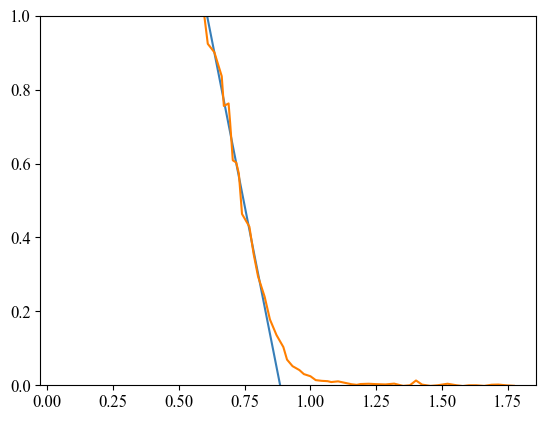

In [37]:
cut = np.intersect1d(np.where(dIdV_435 > -0.8), np.where(dIdV_435 < -0.20))
result_435, neg_dIdV_fit_435 = fit_for_wavelength(V_435, dIdV_435, cut)
plt.ylim(0,1)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 9
    # variables        = 2
    chi-square         = 43.4355173
    reduced chi-square = 6.20507390
    Akaike info crit   = 18.1664761
    Bayesian info crit = 18.5609253
    R-squared          = 0.97496331
[[Variables]]
    m: -2.93559039 +/- 0.17780369 (6.06%) (init = 0)
    b:  0.89954346 +/- 0.02944923 (3.27%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(m, b) = -0.9358
0.3064267640391325


(0.0, 1.0)

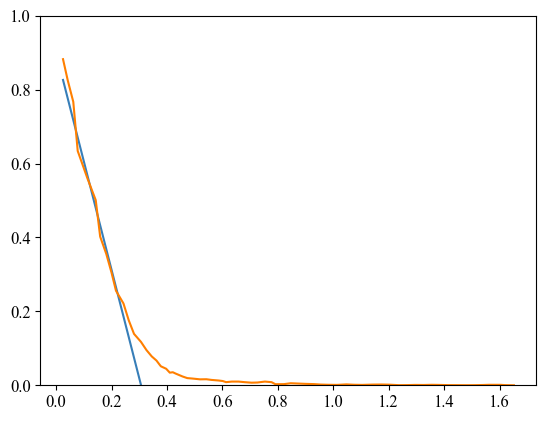

In [38]:
cut = np.intersect1d(np.where(dIdV_546 > -0.8), np.where(dIdV_546 < -0.20))
result_546, neg_dIdV_fit_546 = fit_for_wavelength(V_546, dIdV_546, cut)
plt.ylim(0,1)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 8
    # variables        = 2
    chi-square         = 5.02011570
    reduced chi-square = 0.83668595
    Akaike info crit   = 0.27209151
    Bayesian info crit = 0.43097459
    R-squared          = 0.92934473
[[Variables]]
    m: -1.05248960 +/- 0.11847482 (11.26%) (init = 0)
    b:  0.19366735 +/- 0.01070043 (5.53%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(m, b) = -0.9259
0.18400880574793574


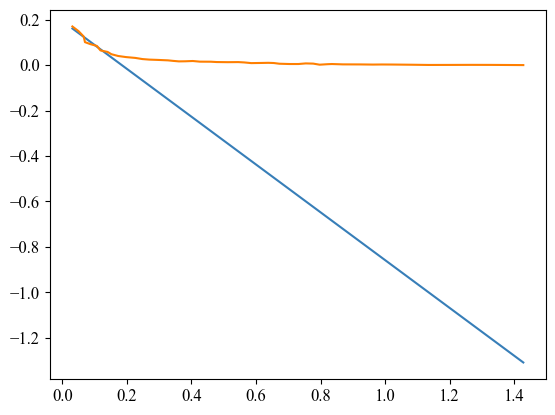

In [39]:
cut = np.where(dIdV_577 < -0.05)
result_577, neg_dIdV_fit_577 = fit_for_wavelength(V_577, dIdV_577, cut)

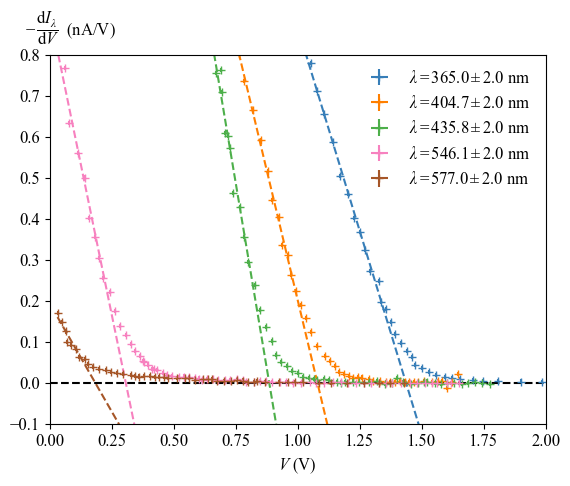

In [40]:

plt.errorbar(V_365, -dIdV_365, xerr = 0.0014, 
             yerr = 0.00010/0.02,
             label = r"$\lambda = 365.0 \pm 2.0$ nm", color = "C0", fmt='+')
plt.plot(V_365, neg_dIdV_fit_365, 
         #label = r"linear fit", 
         color = "C0", linestyle = "--")


plt.errorbar(V_404, -dIdV_404, xerr = 0.0014, 
             yerr = 0.00010/0.02,
             label = r"$\lambda = 404.7 \pm 2.0$ nm", color = "C1", fmt='+')
plt.plot(V_404, neg_dIdV_fit_404, 
         #label = r"linear fit", 
         color = "C1", linestyle = "--")


plt.errorbar(V_435, -dIdV_435, xerr = 0.0014, 
             yerr = 0.00010/0.02,
             label = r"$\lambda = 435.8 \pm 2.0$ nm", color = "C2", fmt='+')
plt.plot(V_435, neg_dIdV_fit_435, 
#         label = r"linear fit",
         color = "C2", linestyle = "--")


plt.errorbar(V_546, -dIdV_546, xerr = 0.0014, 
             yerr = 0.00010/0.02,
             label = r"$\lambda = 546.1 \pm 2.0$ nm", color = "C3", fmt='+')
plt.plot(V_546, neg_dIdV_fit_546, 
         #label = r"linear fit", 
         color = "C3", linestyle = "--")

plt.errorbar(V_577, -dIdV_577, xerr = 0.0014, 
             yerr = 0.00010/0.02,
             label = r"$\lambda = 577.0 \pm 2.0$ nm", color = "C4", fmt='+')
plt.plot(V_577, neg_dIdV_fit_577, 
 #        label = r"linear fit", 
         color = "C4", linestyle = "--")


plt.axhline(0, color='black', linestyle='--')
plt.xlabel(r"$V$ (V)")
plt.xlim(0, 2)
plt.ylim(-0.1,0.8)
plt.legend(loc = "upper right", frameon = False)
plt.annotate(r"$ -\,\dfrac{\mathrm{d} I_\lambda}{\mathrm{d}V}$  (nA/V)", xy=(-0.05,1.05), xycoords="axes fraction" ) 
plt.savefig('dIdV_withfit.pdf')

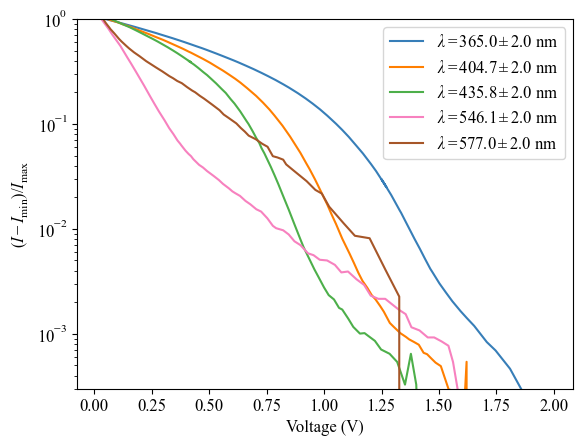

In [51]:
plt.rcParams["font.family"] = "Times New Roman"     # Normal text
plt.rcParams["mathtext.fontset"] = "custom"        # Custom math font
plt.rcParams["mathtext.rm"] = "Times New Roman"    # Roman font for math
plt.rcParams["mathtext.it"] = "Times New Roman:italic"
plt.rcParams["mathtext.bf"] = "Times New Roman:bold"

# Optional: increase default font size
plt.rcParams["font.size"] = 12

plt.plot(V_365, (I_365-min(I_365))/I_365[0], label = r"$\lambda = 365.0 \pm 2.0$ nm")
plt.plot(V_404, (I_404-min(I_404))/I_404[0], label = r"$\lambda = 404.7 \pm 2.0$ nm")
plt.plot(V_435, (I_435-min(I_435))/I_435[0], label = r"$\lambda = 435.8 \pm 2.0$ nm")
plt.plot(V_546, (I_546-min(I_546))/I_546[0], label = r"$\lambda = 546.1 \pm 2.0$ nm")
plt.plot(V_577, (I_577-min(I_577))/I_577[0], label = r"$\lambda = 577.0 \pm 2.0$ nm")
plt.axhline(0, color='black', linestyle='--')

plt.xlabel("Voltage (V)")
plt.ylabel(r"$(I-I_\mathrm{min})/I_\mathrm{max}$")
plt.yscale('log')
#plt.xlim(0,0.5)
plt.ylim(3e-4,1)
plt.legend()

In [287]:
def current_model(V, I_0, beta, V_stop, I_res, alpha):
    return np.where(
        V > V_stop,
        I_res + alpha * (V - V_stop),
        I_0 * (np.exp(beta * (V_stop - V)) - 1) + I_res
    )

def current_model_exp(V, Vs, I0, I_res, alpha, beta):
    return np.where(
        V > Vs,
        I0*np.exp(alpha*(V-Vs))+I_res,
        I0*np.exp(beta*(Vs-V))+I_res )

def current_model_pow(V, Vs, I0, I_res, n):
    return np.where(
        V < Vs,
        I0*(Vs-V)**n + I_res,
        I_res )

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 584
    # data points      = 43
    # variables        = 5
    chi-square         = 8.36207552
    reduced chi-square = 0.22005462
    Akaike info crit   = -60.4122184
    Bayesian info crit = -51.6062178
    R-squared          = 0.99457279
[[Variables]]
    I_0:     0.05934793 +/- 2504.20677 (4219535.31%) (init = 0.5)
    beta:    6.29204270 +/- 0.37840361 (6.01%) (init = 1.2)
    V_stop:  0.46150281 +/- 6706.17783 (1453117.44%) (init = 1.2)
    I_res:   0.11838779 +/- 2504.21856 (2115267.60%) (init = -0.05)
    alpha:  -0.37342760 +/- 0.03242399 (8.68%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(V_stop, I_res) = -1.0000
    C(I_0, V_stop)   = -1.0000
    C(I_0, I_res)    = +1.0000
    C(I_0, alpha)    = +0.6273
    C(V_stop, alpha) = -0.6273
    C(I_res, alpha)  = +0.6273
    C(beta, I_res)   = +0.4876
    C(beta, V_stop)  = -0.4876
    C(I_0, beta)     = +0.4876


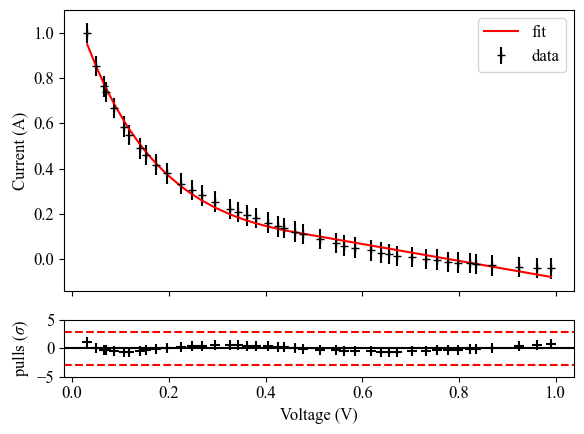

In [220]:
#### run fit
V = V_577
data  = I_577/I_577[0]
data_err = 0.0010/I_577[0]

cut = np.where(V<1)

V = V[cut]
data  = data[cut]
#data_err = data_err[cut]

#print(data, V, data_err)

model = lmfit.Model(current_model)
params = model.make_params(I_0=0.5, beta=1.2, V_stop=1.2, I_res=-0.05, alpha=0) 
#params["alpha"].set(value=0, vary=False)

result = model.fit(V=V, data=data, 
                   weights=1/data_err, 
                   params = params)

lmfit.report_fit(result)

####plotting
data_fit = model.eval(result.params,V=V)
pull = (data-data_fit)/data_err

# --- Create figure with 2 panels ---
fig, (ax_main, ax_pull) = plt.subplots(
    2, 1, sharex=True,
    gridspec_kw={'height_ratios': [5, 1]},
    figsize=(6, 4.5)
)

# --- Top: data + fit ---
ax_main.errorbar(V, data, data_err, fmt='k+', label='data')
ax_main.plot(V, data_fit, color='red', label= 'fit')
ax_main.set_ylabel(r"Current (A)")
ax_main.legend(loc="upper right", bbox_to_anchor=(1, 1))

# --- Bottom: pulls ---
ax_pull.scatter(V, pull, color='black', marker="+", s=50)
ax_pull.axhline(0, color='black', linestyle='-')
ax_pull.axhline(3, color='red', linestyle='--')
ax_pull.axhline(-3, color='red', linestyle='--')
ax_pull.set_xlabel(r"Voltage (V)")
ax_pull.set_ylabel(r"pulls ($\sigma$)")
ax_pull.set_ylim(-5,5)

plt.tight_layout()
plt.show()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10000
    # data points      = 43
    # variables        = 4
    chi-square         = 14.8205917
    reduced chi-square = 0.38001517
    Akaike info crit   = -37.8028506
    Bayesian info crit = -30.7580502
    R-squared          = 0.99038105
##  Warning: uncertainties could not be estimated:
[[Variables]]
    Vs:     7.28729421 (init = 0.2)
    I0:     8.5975e-30 (init = 1)
    I_res: -0.02355728 (init = -0.05)
    n:      33.7310783 (init = 1)


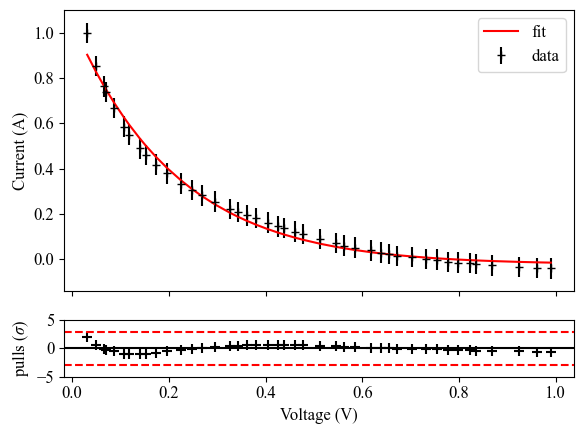

In [289]:
#### run fit
V = V_577
data  = I_577/I_577[0]
data_err = 0.0010/I_577[0]

cut = np.where(V<1)

V = V[cut]
data  = data[cut]
#data_err = data_err[cut]

#print(data, V, data_err)

model = lmfit.Model(current_model_pow)
params = model.make_params(Vs=0.2, I0=1, I_res=-0.05, n=1) 
#params["alpha"].set(value=0, vary=False)

result = model.fit(V=V, data=data, 
                   weights=1/data_err, 
                   params = params)

lmfit.report_fit(result)

####plotting
data_fit = model.eval(result.params,V=V)
pull = (data-data_fit)/data_err

# --- Create figure with 2 panels ---
fig, (ax_main, ax_pull) = plt.subplots(
    2, 1, sharex=True,
    gridspec_kw={'height_ratios': [5, 1]},
    figsize=(6, 4.5)
)

# --- Top: data + fit ---
ax_main.errorbar(V, data, data_err, fmt='k+', label='data')
ax_main.plot(V, data_fit, color='red', label= 'fit')
ax_main.set_ylabel(r"Current (A)")
ax_main.legend(loc="upper right", bbox_to_anchor=(1, 1))

# --- Bottom: pulls ---
ax_pull.scatter(V, pull, color='black', marker="+", s=50)
ax_pull.axhline(0, color='black', linestyle='-')
ax_pull.axhline(3, color='red', linestyle='--')
ax_pull.axhline(-3, color='red', linestyle='--')
ax_pull.set_xlabel(r"Voltage (V)")
ax_pull.set_ylabel(r"pulls ($\sigma$)")
ax_pull.set_ylim(-5,5)

plt.tight_layout()
plt.show()

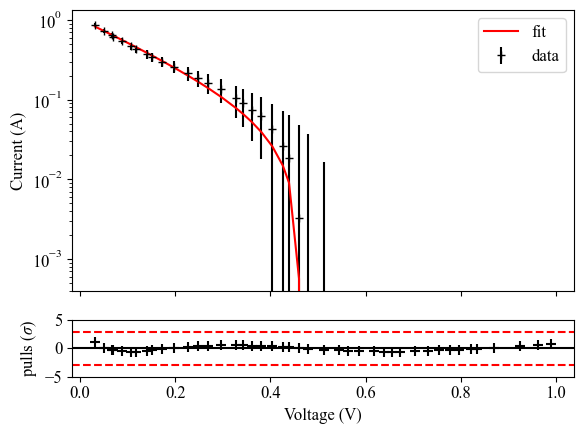

In [221]:
# --- Create figure with 2 panels ---
fig, (ax_main, ax_pull) = plt.subplots(
    2, 1, sharex=True,
    gridspec_kw={'height_ratios': [5, 1]},
    figsize=(6, 4.5)
)

# --- Top: data + fit ---
ax_main.errorbar(V, data - result.params['I_res'], data_err, fmt='k+', label='data')
ax_main.plot(V, data_fit - result.params['I_res'], color='red', label= 'fit')
ax_main.set_ylabel(r"Current (A)")
ax_main.legend(loc="upper right", bbox_to_anchor=(1, 1))
ax_main.set_yscale('log')

# --- Bottom: pulls ---
ax_pull.scatter(V, pull, color='black', marker="+", s=50)
ax_pull.axhline(0, color='black', linestyle='-')
ax_pull.axhline(3, color='red', linestyle='--')
ax_pull.axhline(-3, color='red', linestyle='--')
ax_pull.set_xlabel(r"Voltage (V)")
ax_pull.set_ylabel(r"pulls ($\sigma$)")
ax_pull.set_ylim(-5,5)

plt.tight_layout()
plt.show()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 61
    # data points      = 24
    # variables        = 5
    chi-square         = 100.549979
    reduced chi-square = 5.29210417
    Akaike info crit   = 44.3824259
    Bayesian info crit = 50.2726951
    R-squared          = 0.99962955
[[Variables]]
    Vs:     1.38220860 +/- 0.00678830 (0.49%) (init = 1.1)
    I0:     0.03126773 +/- 0.00228144 (7.30%) (init = 0.09)
    I_res: -0.05509872 +/- 0.00205892 (3.74%) (init = -0.2)
    alpha: -1.12541084 +/- 0.16500010 (14.66%) (init = -0.1)
    beta:   4.16448450 +/- 0.11841688 (2.84%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(I_res, beta)  = +0.9773
    C(I0, I_res)    = -0.9531
    C(I0, beta)     = -0.9243
    C(Vs, I0)       = -0.7495
    C(Vs, I_res)    = +0.5289
    C(I_res, alpha) = -0.5073
    C(alpha, beta)  = -0.4958
    C(Vs, beta)     = +0.4482
    C(Vs, alpha)    = +0.2920
    C(I0, alpha)    = +0.2664


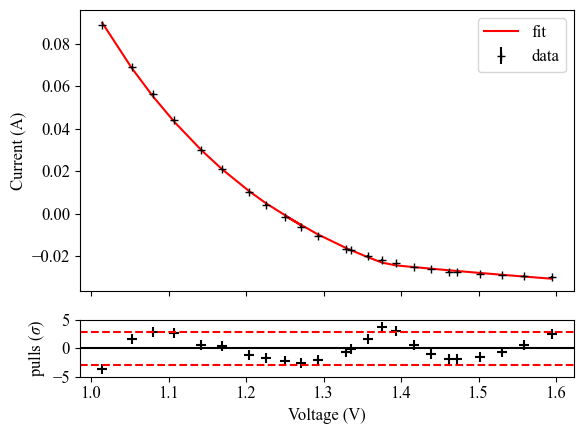

In [286]:
#### run fit
V = V_365
data  = I_365/I_365[0]
data_err = 0.0005/I_365[0]

cut = np.intersect1d(np.where(V<1.6), np.where(V>1))

V = V[cut]
data  = data[cut]
#data_err = data_err[cut]

#print(data, V, data_err)

model = lmfit.Model(current_model_exp)

params = model.make_params(Vs=1.1, I0=0.09, I_res=-0.2, alpha=-0.1, beta=1) 
#params["alpha"].set(value=0, vary=False)

result = model.fit(V=V, data=data, 
                   weights=1/data_err, 
                   params = params)

lmfit.report_fit(result)

####plotting
data_fit = model.eval(result.params,V=V)
pull = (data-data_fit)/data_err

# --- Create figure with 2 panels ---
fig, (ax_main, ax_pull) = plt.subplots(
    2, 1, sharex=True,
    gridspec_kw={'height_ratios': [5, 1]},
    figsize=(6, 4.5)
)

# --- Top: data + fit ---
ax_main.errorbar(V, data, data_err, fmt='k+', label='data')
ax_main.plot(V, data_fit, color='red', label= 'fit')
ax_main.set_ylabel(r"Current (A)")
ax_main.legend(loc="upper right", bbox_to_anchor=(1, 1))

# --- Bottom: pulls ---
ax_pull.scatter(V, pull, color='black', marker="+", s=50)
ax_pull.axhline(0, color='black', linestyle='-')
ax_pull.axhline(3, color='red', linestyle='--')
ax_pull.axhline(-3, color='red', linestyle='--')
ax_pull.set_xlabel(r"Voltage (V)")
ax_pull.set_ylabel(r"pulls ($\sigma$)")
ax_pull.set_ylim(-5,5)

plt.tight_layout()
plt.show()

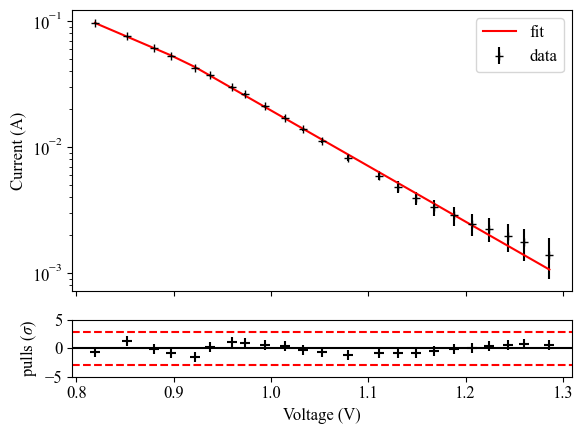

In [281]:
# --- Create figure with 2 panels ---
fig, (ax_main, ax_pull) = plt.subplots(
    2, 1, sharex=True,
    gridspec_kw={'height_ratios': [5, 1]},
    figsize=(6, 4.5)
)

# --- Top: data + fit ---
ax_main.errorbar(V, data - result.params['I_res'], data_err, fmt='k+', label='data')
ax_main.plot(V, data_fit - result.params['I_res'], color='red', label= 'fit')
ax_main.set_ylabel(r"Current (A)")
ax_main.legend(loc="upper right", bbox_to_anchor=(1, 1))
ax_main.set_yscale('log')

# --- Bottom: pulls ---
ax_pull.scatter(V, pull, color='black', marker="+", s=50)
ax_pull.axhline(0, color='black', linestyle='-')
ax_pull.axhline(3, color='red', linestyle='--')
ax_pull.axhline(-3, color='red', linestyle='--')
ax_pull.set_xlabel(r"Voltage (V)")
ax_pull.set_ylabel(r"pulls ($\sigma$)")
ax_pull.set_ylim(-5,5)

plt.tight_layout()
plt.show()

## exponential to linear

lambda = 365.0 \pm 2.0 ; V_stop = 1.27242073 +/- 0.00515659 

lambda = 404.7 \pm 2.0 ; V_stop = 0.94742800 +/- 0.00486938

lambda = 435.8 \pm 2.0 ; V_stop = 0.78679728 +/- 0.00374387

lambda = 546.1 \pm 2.0 ; V_stop = 0.39405158 +/- 0.00792198

lambda = 577.5 \pm 2.0 ; V_stop = 0.18303254 +/- 0.00927534 

## exponential to exponential

lambda = 365.0 \pm 2.0 ; V_stop = 1.25981707 +/- 0.00553203

lambda = 404.7 \pm 2.0 ; V_stop = 0.94721466 +/- 0.00487757

lambda = 435.8 \pm 2.0 ; V_stop = 0.78671777 +/- 0.00375036 

lambda = 546.1 \pm 2.0 ; V_stop = 0.38490796 +/- 0.00732267

lambda = 577.5 \pm 2.0 ; V_stop = 0.12720288 +/- 0.00315049

In [225]:
c = 299792458

nu_res = np.array([c/365.0,  c/404.7, c/435.8, c/546.1, c/577.5])*1e9

V_stop_res = np.array([1.27242073, 0.94742800 , 0.78679728, 0.39405158, 0.12720288])
V_stop_err = np.array([0.00515659, 0.00486938, 0.00374387, 0.00792198, 0.00315049])

In [227]:
data  = V_stop_res
data_err = V_stop_err
x = nu_res


model = lmfit.Model(linear)

result = model.fit(x=x, data=data, 
                   weights=1/data_err, m = 1e-15, b = 0.5)

lmfit.report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 5
    # variables        = 2
    chi-square         = 368.926000
    reduced chi-square = 122.975333
    Akaike info crit   = 25.5057908
    Bayesian info crit = 24.7246667
    R-squared          = 0.97615075
[[Variables]]
    m:  3.7169e-15 +/- 1.8934e-16 (5.09%) (init = 1e-15)
    b: -1.78198442 +/- 0.12365584 (6.94%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(m, b) = -0.9849


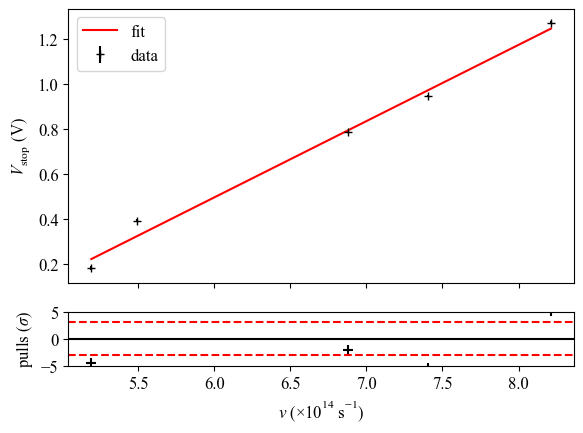

In [199]:
####plotting
data_fit = model.eval(result.params,x=x)
pull = (data-data_fit)/data_err

# --- Create figure with 2 panels ---
fig, (ax_main, ax_pull) = plt.subplots(
    2, 1, sharex=True,
    gridspec_kw={'height_ratios': [5, 1]},
    figsize=(6, 4.5)
)

# --- Top: data + fit ---
ax_main.errorbar(x/1e14, data, yerr=data_err, fmt = "+", label='data', color = 'black')

ax_main.plot(x/1e14, data_fit, color='red', label= 'fit')
ax_main.set_ylabel(r"$V_\mathrm{stop}$ (V)")
ax_main.legend(loc="upper left", bbox_to_anchor=(0, 1))

# --- Bottom: pulls ---
ax_pull.scatter(x/1e14, pull, color='black', marker="+", s=50)
ax_pull.axhline(0, color='black', linestyle='-')
ax_pull.axhline(3, color='red', linestyle='--')
ax_pull.axhline(-3, color='red', linestyle='--')
ax_pull.set_xlabel(r"$\nu$ ($\times 10^{14}$ s$^{-1}$)")
ax_pull.set_ylabel(r"pulls ($\sigma$)")
ax_pull.set_ylim(-5,5)

plt.tight_layout()
plt.show()

## exponential to exponential

lambda = 365.0 \pm 2.0 ; V_stop = 1.25981707 +/- 0.00553203

lambda = 404.7 \pm 2.0 ; V_stop = 0.94721466 +/- 0.00487757

lambda = 435.8 \pm 2.0 ; V_stop = 0.78671777 +/- 0.00375036 

lambda = 546.1 \pm 2.0 ; V_stop = 0.35471794 +/- 0.00622141

lambda = 577.5 \pm 2.0 ; V_stop = 0.18303254 +/- 0.00927534 

In [240]:
c = 299792458

nu_res = np.array([c/365.0,  c/404.7, c/435.8, c/546.1, c/577.5])*1e9

V_stop_res = np.array([1.25981707, 0.94721466 , 0.78671777 , 0.35471794, 0.12720288])
V_stop_err = np.array([0.00553203, 0.00487757, 0.00375036 , 0.00622141, 0.00315049])

In [55]:
c = 299792458

nu_res = np.array([c/365.0,  c/404.7, c/435.8, c/546.1, c/577.5])*1e9

V_stop_res = np.array([1.55, 1.25 , 1.00 , 0.35, 0.18])
V_stop_err = np.array([0.00553203, 0.00487757, 0.00375036 , 0.00622141, 0.00315049])

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 5
    # variables        = 2
    chi-square         = 165.537351
    reduced chi-square = 55.1791170
    Akaike info crit   = 21.4987947
    Bayesian info crit = 20.7176705
    R-squared          = 0.99703066
[[Variables]]
    m:  4.6550e-15 +/- 1.2839e-16 (2.76%) (init = 1e-15)
    b: -2.22312101 +/- 0.08294490 (3.73%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(m, b) = -0.9852


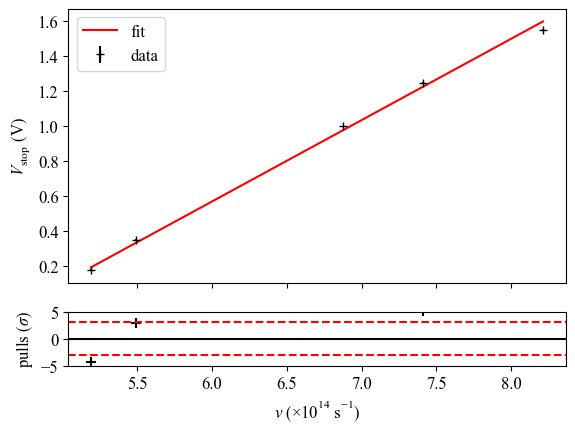

In [56]:
data  = V_stop_res
data_err = V_stop_err
x = nu_res


model = lmfit.Model(linear)

result = model.fit(x=x, data=data, 
                   weights=1/data_err, m = 1e-15, b = 0.5)

lmfit.report_fit(result)
####plotting
data_fit = model.eval(result.params,x=x)
pull = (data-data_fit)/data_err

# --- Create figure with 2 panels ---
fig, (ax_main, ax_pull) = plt.subplots(
    2, 1, sharex=True,
    gridspec_kw={'height_ratios': [5, 1]},
    figsize=(6, 4.5)
)

# --- Top: data + fit ---
ax_main.errorbar(x/1e14, data, yerr=data_err, fmt = "+", label='data', color = 'black')

ax_main.plot(x/1e14, data_fit, color='red', label= 'fit')
ax_main.set_ylabel(r"$V_\mathrm{stop}$ (V)")
ax_main.legend(loc="upper left", bbox_to_anchor=(0, 1))

# --- Bottom: pulls ---
ax_pull.scatter(x/1e14, pull, color='black', marker="+", s=50)
ax_pull.axhline(0, color='black', linestyle='-')
ax_pull.axhline(3, color='red', linestyle='--')
ax_pull.axhline(-3, color='red', linestyle='--')
ax_pull.set_xlabel(r"$\nu$ ($\times 10^{14}$ s$^{-1}$)")
ax_pull.set_ylabel(r"pulls ($\sigma$)")
ax_pull.set_ylim(-5,5)

plt.tight_layout()
plt.show()